# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [165]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [166]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [167]:
# Your code here:
# Information about dataframe
customers.info()

# First 5 rows of dataframe
customers.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [168]:
# Unique values of feature Channel
customers['Channel'].unique()

array([2, 1], dtype=int64)

In [169]:
# Value counts of feature Channel
customers['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [170]:
# Unique values of feature Region
customers['Region'].unique()

array([3, 1, 2], dtype=int64)

In [171]:
# Value counts of feature Region
customers['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [172]:
# Correlations
customers.corr(method= 'spearman')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.047156,-0.178541,0.613719,0.708922,-0.236294,0.745970,0.164936
Region,0.047156,1.000000,0.046885,0.040751,0.003535,-0.076756,0.010728,0.009313
Fresh,-0.178541,0.046885,1.000000,-0.083921,-0.119983,0.384395,-0.198333,0.238400
Milk,0.613719,0.040751,-0.083921,1.000000,0.773049,-0.092971,0.679979,0.372771
Grocery,0.708922,0.003535,-0.119983,0.773049,1.000000,-0.168831,0.801282,0.304256
Frozen,-0.236294,-0.076756,0.384395,-0.092971,-0.168831,1.000000,-0.207183,0.233024
Detergents_Paper,0.745970,0.010728,-0.198333,0.679979,0.801282,-0.207183,1.000000,0.183314
Delicassen,0.164936,0.009313,0.238400,0.372771,0.304256,0.233024,0.183314,1.000000


array([43088, 56159, 44466, 40721, 43265, 56082, 76237, 42312, 45640,
       112151, 47493, 56083, 53205, 49063, 68951, 40254, 42786, 39679,
       38793, 39228], dtype=object)

array([36423, 20484, 15729, 22044, 54259, 21412, 29892, 38369, 20959,
       46197, 73498, 27472, 16729, 15726, 25862, 29627, 43950, 28326,
       16599, 23133, 17972, 23527, 20655, 25071, 16784, 18664, 21858,
       16687], dtype=object)

array([25957, 23998, 55571, 28921, 26866, 59598, 45828, 28540, 92780,
       32114, 32034, 28986, 34792, 26870, 24708, 23596, 39694, 36486,
       33586, 24773, 26839, 67298, 26316, 30243], dtype=object)

array([9408, 10002, 9510, 7782, 10643, 8872, 8132, 9735, 8693, 35009,
       18028, 8853, 16538, 8195, 8425, 16745, 36534, 7888, 18711, 8321,
       11422, 10155, 16919, 10303, 8692, 8366, 12569, 60869, 7849, 11559,
       8170, 15601, 9584, 8164, 9927, 8620, 13223, 9806, 17866, 15348,
       15082, 13486, 13135], dtype=object)

array([9529, 24171, 13583, 17740, 26701, 24231, 12034, 40827, 20070,
       18906, 12591, 11577, 13726, 9836, 9959, 14235, 12420, 19410, 13308,
       18594, 10069, 11783, 17120, 12408, 9606, 38102, 15469, 12218,
       12638, 14841], dtype=object)

array([7844, 5185, 4478, 4334, 16523, 5778, 5206, 4626, 5864, 4985, 6465,
       14472, 14351, 5130, 4430, 6250, 8550, 47943, 6854, 6372, 5121,
       5609, 4100, 4829, 5120, 5137, 4365], dtype=object)

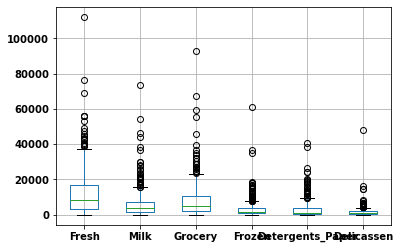

In [173]:
# Boxplot
bplt = customers[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].boxplot(return_type= 'both')

# Outliers of 'Fresh'
display(bplt[1]['fliers'][0].get_data()[1])

# Outliers of 'Milk'
display(bplt[1]['fliers'][1].get_data()[1])

# Outliers of 'Grocery'
display(bplt[1]['fliers'][2].get_data()[1])

# Outliers of 'Frozen'
display(bplt[1]['fliers'][3].get_data()[1])

# Outliers of 'Detergents_Paper'
display(bplt[1]['fliers'][4].get_data()[1])

# Outliers of 'Delicassen'
display(bplt[1]['fliers'][5].get_data()[1])

In [174]:
# Outliers considering IQR
outliers = customers.loc[(customers['Fresh'] > 1.5*(np.quantile(customers['Fresh'], 0.75)-np.quantile(customers['Fresh'], 0.25))\
               + np.quantile(customers['Fresh'], 0.75)) |
              (customers['Milk'] > 1.5*(np.quantile(customers['Milk'], 0.75)-np.quantile(customers['Milk'], 0.25))\
               + np.quantile(customers['Milk'], 0.75)) | 
              (customers['Grocery'] > 1.5*(np.quantile(customers['Grocery'], 0.75)-np.quantile(customers['Grocery'], 0.25))\
               + np.quantile(customers['Grocery'], 0.75)) |
              (customers['Frozen'] > 1.5*(np.quantile(customers['Frozen'], 0.75)-np.quantile(customers['Frozen'], 0.25))\
               + np.quantile(customers['Frozen'], 0.75)) |
              (customers['Detergents_Paper'] > 1.5*(np.quantile(customers['Detergents_Paper'], 0.75)- np.quantile(customers['Detergents_Paper'], 0.25))\
               + np.quantile(customers['Detergents_Paper'], 0.75)) |
              (customers['Delicassen'] > 1.5*(np.quantile(customers['Delicassen'], 0.75)-np.quantile(customers['Delicassen'], 0.25))\
               + np.quantile(customers['Delicassen'], 0.75)) |
              (customers['Fresh'] < - 1.5*(np.quantile(customers['Fresh'], 0.75)-np.quantile(customers['Fresh'], 0.25))\
               + np.quantile(customers['Fresh'], 0.25)) |
              (customers['Milk'] < - 1.5*(np.quantile(customers['Milk'], 0.75)-np.quantile(customers['Milk'], 0.25))\
               + np.quantile(customers['Milk'], 0.25)) |
              (customers['Grocery'] < - 1.5*(np.quantile(customers['Grocery'], 0.75)-np.quantile(customers['Grocery'], 0.25))\
               + np.quantile(customers['Grocery'], 0.25)) |
              (customers['Frozen'] < - 1.5*(np.quantile(customers['Frozen'], 0.75)-np.quantile(customers['Frozen'], 0.25))\
               + np.quantile(customers['Frozen'], 0.25)) | 
              (customers['Detergents_Paper'] < - 1.5*(np.quantile(customers['Detergents_Paper'], 0.75)- np.quantile(customers['Detergents_Paper'], 0.25))\
               + np.quantile(customers['Detergents_Paper'], 0.25)) |
              (customers['Delicassen'] < - 1.5*(np.quantile(customers['Delicassen'], 0.75)-np.quantile(customers['Delicassen'], 0.25))\
               + np.quantile(customers['Delicassen'], 0.25)), :]
len(outliers)

108

In [175]:
# Descriptive statistics of dataframe
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [176]:
# Skewness and kurtosis of features
print('Skew')
display(customers.skew())
print('\n')
print('Kurtosis')
display(customers.kurt())

Skew


Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64



Kurtosis


Channel              -1.427463
Region               -0.100111
Fresh                11.536408
Milk                 24.669398
Grocery              20.914670
Frozen               54.689281
Detergents_Paper     19.009464
Delicassen          170.694939
dtype: float64

In [177]:
# Cumulative sum of rows
total_spent = customers.drop(columns= ['Channel', 'Region']).cumsum(axis= 1)['Delicassen'].rename('total spent')

# Percentage of m.u. spent by 20 % of people that spend more money
sum(total_spent.sort_values(ascending= False).head(int(0.2*len(customers))))/\
sum(total_spent)*100

42.90483942679298

In [178]:
# Your observations here

# The Channels has 2 unique values and seem to represent the subcategory of store. The Region has 3 unique values 
# and seem to represent different geographical regions. The columns Fresh, Milk, Grocery, Frozen, Detergents_Paper and 
# Delicassen seem to contain the amount spent in each category.

# In dataset there is categorical data that needs to be droped: 'Channel' and 'Region'

# There is no missing data to remove.

# The correlation between Grocery and Detergents_Paper is above 0.9.

# There are 108 rows with outliers, considering the IQR mehod, in columns Fresh, Milk, Grocery, Frozen, Detergents_Paper and
# Delicassen.

# All columns are right skewed.

# The top 20 % of people spending more money spend around 43 % of the total of money spent. This dataset does not follow the
# Pareto principle.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [179]:
# Drop all categorical columns
customers.drop(columns= ['Channel', 'Region'], inplace= True)

In [180]:
# Your comment here
# Using IQR in the beginning, it was detected that approximately 1/4 of dataset were outliers. Based on this, a cubic root 
# transformation was performed, because it was the one that reduced outliers the most, comparing to natural logarithm and 
# square root. This transformation was performed in numeric variables ('Fresh', 'Milk', 'Grocery', 'Frozen', 
# 'Detergents_Paper', 'Delicassen'). On the other hand, dummy variables were created based on the categorical variables 
# ('Channel' and 'Region').

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [181]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Your code here:
# Instantiation of StandardScaler
scaler = StandardScaler()

# Standardization of all columns
scaler.fit(customers)

customers_scale = scaler.transform(customers)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


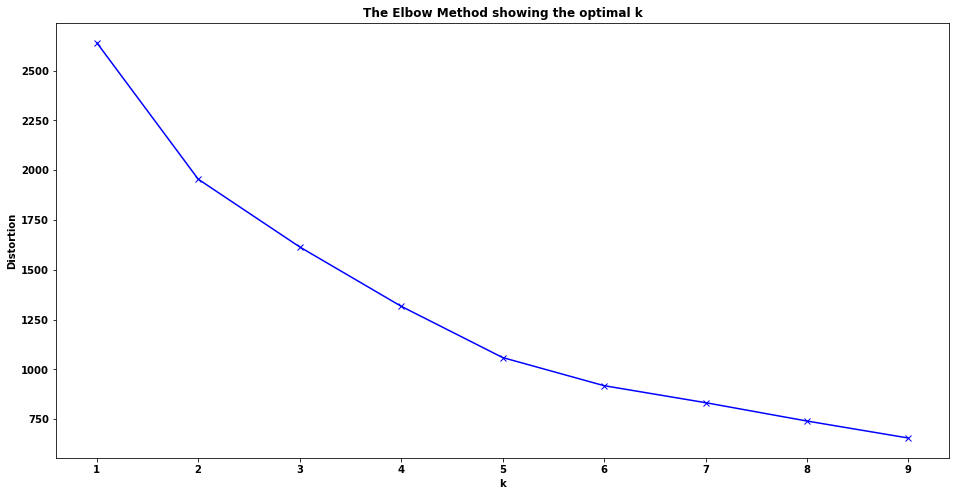

In [182]:
# Leg plot for helping to choose a value for n_clusters
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters= k, random_state= 0)
    kmeans.fit(customers_scale)
    distortions.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [183]:
# Your code here:
# Import of KMeans
from sklearn.cluster import KMeans

# Instantiation and fit of KMeans to standardized data
kmeans = KMeans(n_clusters= 2, random_state= 0).fit(customers_scale)

# Storage of labels of clusters in dataframe 'customers'
customers['labels'] = kmeans.labels_

Count the values in `labels`.

In [184]:
# Your code here:
customers['labels'].value_counts()

1    404
0     36
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [185]:
# Your code here
# Import of KMeans
from sklearn.cluster import DBSCAN

# Instantiation and fit of DBSCAN to standardized data
clustering = DBSCAN(eps= 0.5).fit(customers_scale)

# Storage of labels of clusters in dataframe 'customers'
customers['labels_DBSCAN'] = clustering.labels_

Count the values in `labels_DBSCAN`.

In [186]:
# Your code here
customers['labels_DBSCAN'].value_counts()

 0    261
-1    174
 1      5
Name: labels_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

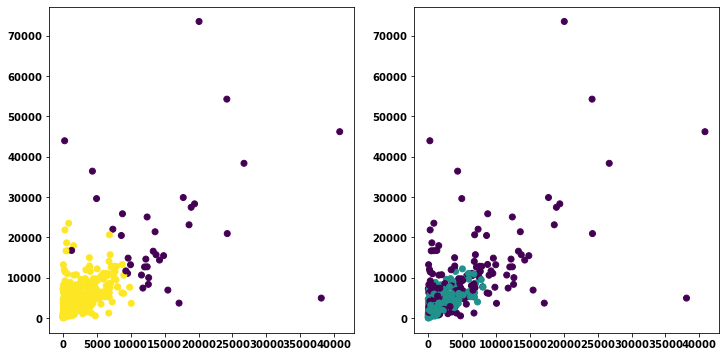

In [187]:
# Your code here:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(customers['Detergents_Paper'], customers['Milk'], c= customers['labels'])
ax[1].scatter(customers['Detergents_Paper'], customers['Milk'], c= customers['labels_DBSCAN'])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

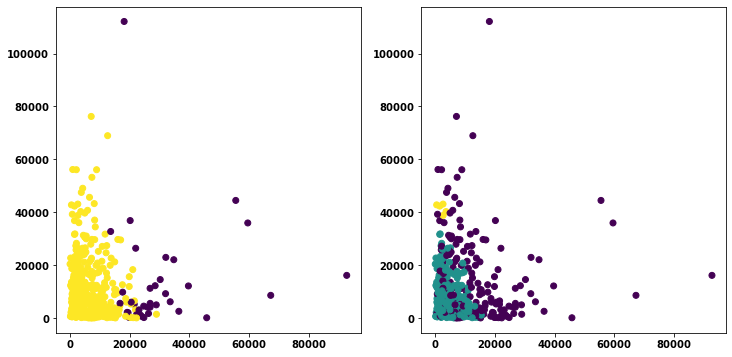

In [188]:
# Your code here:

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(customers['Grocery'], customers['Fresh'], c= customers['labels'])
ax[1].scatter(customers['Grocery'], customers['Fresh'], c= customers['labels_DBSCAN']);

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

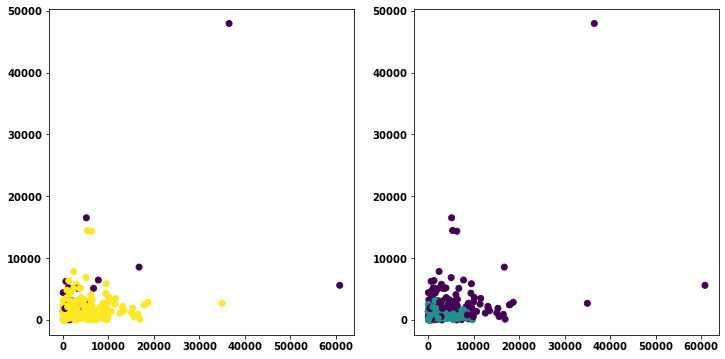

In [189]:
# Your code here:

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(customers['Frozen'], customers['Delicassen'], c= customers['labels'])
ax[1].scatter(customers['Frozen'], customers['Delicassen'], c= customers['labels_DBSCAN']);

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [190]:
# Your code here:
customers.groupby(['labels', 'labels_DBSCAN']).agg('mean')

Fresh          Milk       Grocery       Frozen  \
labels labels_DBSCAN                                                          
0      -1             13556.194444  21922.972222  30602.888889  4968.694444   
1      -1             16144.500000   6890.173913   9282.101449  4738.688406   
        0              9030.398467   3077.318008   4234.061303  1963.432950   
        1             41446.600000   1421.200000   2167.600000  1276.400000   

                      Detergents_Paper   Delicassen  
labels labels_DBSCAN                                 
0      -1                 14516.333333  4142.361111  
1      -1                  2884.862319  2085.152174  
        0                  1322.134100   881.773946  
        1                   416.200000   784.800000

Which algorithm appears to perform better?

In [191]:
# Import of Silhouette Score
from sklearn.metrics import silhouette_score

# Silhouette Scores
display(silhouette_score(customers.drop(columns= 'labels'), customers['labels']))
display(silhouette_score(customers.drop(columns= 'labels_DBSCAN'), customers['labels_DBSCAN']))

0.5618864917202389

0.20689724233872356

In [425]:
# Your observations here
# K-means, with 2 clusters, presents a higher Silhouette Score comparing to DBSCAN, with eps = 0.5

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

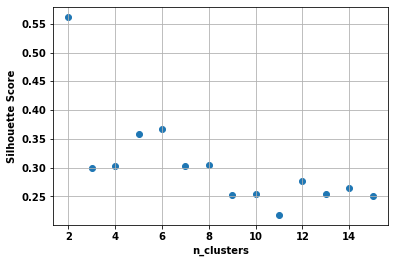

In [216]:
# Your code here
# initialize a list to store the scores
scores= []

# Loop through a list of n_clusters and append the scores of each number of clusters
for k in range(2,16):
    kmeans = KMeans(n_clusters= k, random_state= 0).fit(customers_scale)
    customers['labels'] = kmeans.labels_
    scores.append(silhouette_score(customers.drop(columns= ['labels', 'labels_DBSCAN']), customers['labels']))

# Plot the Silhouette Score varying n_clusters 
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.scatter(range(2,16), scores);

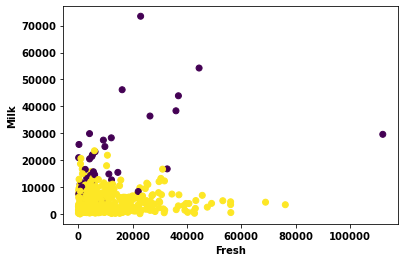

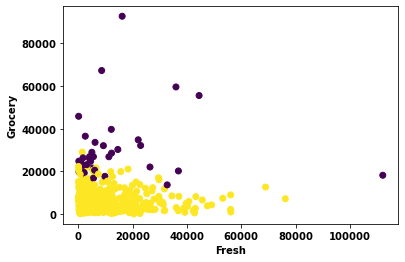

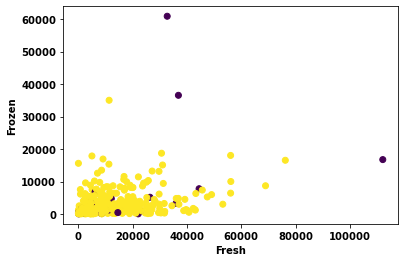

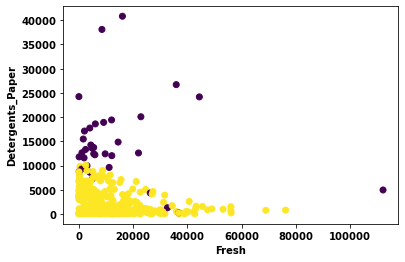

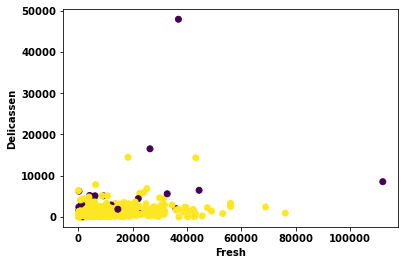

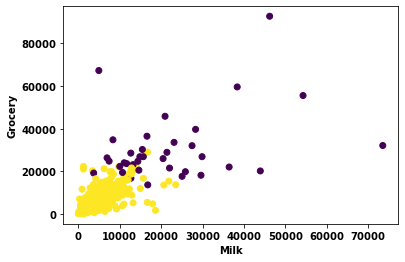

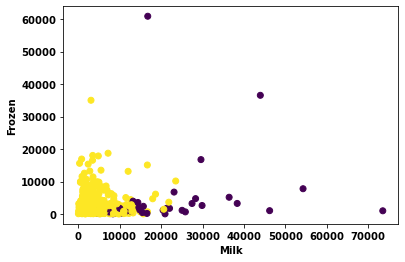

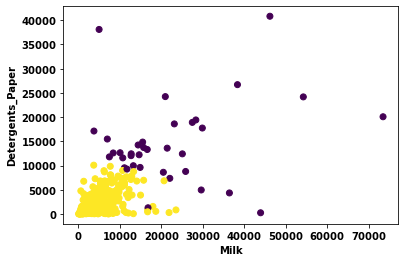

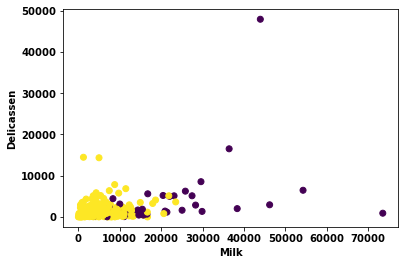

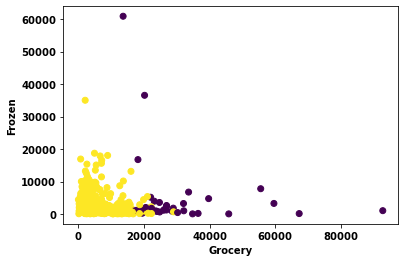

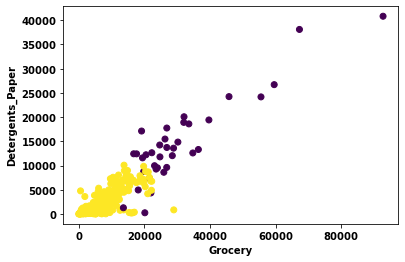

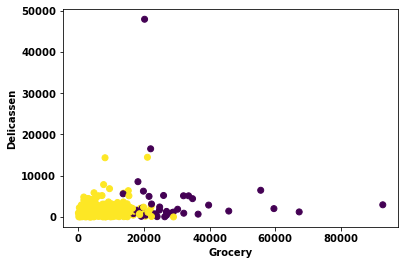

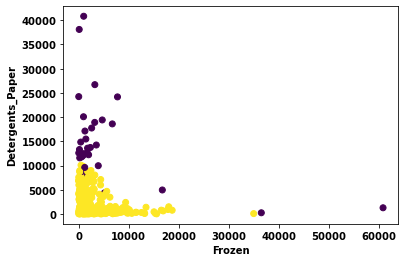

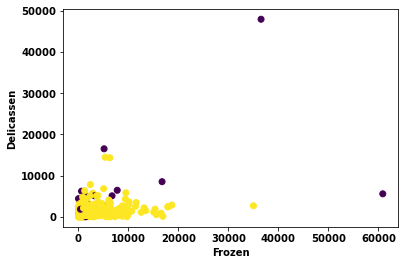

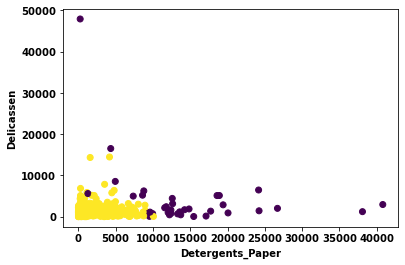

In [217]:
# Apply KMeans for the n_clusters with best Silhouette Score
kmeans = KMeans(n_clusters= np.argmax(scores)+2, random_state= 0).fit(customers_scale)
customers['labels'] = kmeans.labels_

# Scatter plots of every pair of features
plt.scatter(customers['Fresh'], customers['Milk'], c= customers['labels'])
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()
display(plt.scatter(customers['Fresh'], customers['Grocery'], c= customers['labels']))
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.show()
display(plt.scatter(customers['Fresh'], customers['Frozen'], c= customers['labels']))
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.show()
display(plt.scatter(customers['Fresh'], customers['Detergents_Paper'], c= customers['labels']))
plt.xlabel('Fresh')
plt.ylabel('Detergents_Paper')
plt.show()
display(plt.scatter(customers['Fresh'], customers['Delicassen'], c= customers['labels']))
plt.xlabel('Fresh')
plt.ylabel('Delicassen')
plt.show()
display(plt.scatter(customers['Milk'], customers['Grocery'], c= customers['labels']))
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()
display(plt.scatter(customers['Milk'], customers['Frozen'], c= customers['labels']))
plt.xlabel('Milk')
plt.ylabel('Frozen')
plt.show()
display(plt.scatter(customers['Milk'], customers['Detergents_Paper'], c= customers['labels']))
plt.xlabel('Milk')
plt.ylabel('Detergents_Paper')
plt.show()
display(plt.scatter(customers['Milk'], customers['Delicassen'], c= customers['labels']))
plt.xlabel('Milk')
plt.ylabel('Delicassen')
plt.show()
display(plt.scatter(customers['Grocery'], customers['Frozen'], c= customers['labels']))
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.show()
display(plt.scatter(customers['Grocery'], customers['Detergents_Paper'], c= customers['labels']))
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.show()
display(plt.scatter(customers['Grocery'], customers['Delicassen'], c= customers['labels']))
plt.xlabel('Grocery')
plt.ylabel('Delicassen')
plt.show()
display(plt.scatter(customers['Frozen'], customers['Detergents_Paper'], c= customers['labels']))
plt.xlabel('Frozen')
plt.ylabel('Detergents_Paper')
plt.show()
display(plt.scatter(customers['Frozen'], customers['Delicassen'], c= customers['labels']))
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.show()
display(plt.scatter(customers['Detergents_Paper'], customers['Delicassen'], c= customers['labels']))
plt.xlabel('Detergents_Paper')
plt.ylabel('Delicassen')
plt.show()

In [33]:
# Your comment here
# The number of clusters that seem to work best for K-Means is 2.

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [265]:
# Your code here
# initialize a list to store the scores
scores= []

# Loop through two lists (one with eps values and another with min_samples values) and append the scores for each 
# combination
for e in np.arange(0.5,2.6, 0.25):
    for s in np.arange(2,13):
        clustering = DBSCAN(eps= e, min_samples= s).fit(customers_scale)
        customers['labels_DBSCAN'] = clustering.labels_
        scores.append([silhouette_score(customers.drop(columns= ['labels', 'labels_DBSCAN']), customers['labels_DBSCAN']), 
                       e, 
                       s])

In [266]:
# Reshape for being able to visualize the matrix (first column: Silhouette Score, second column eps, third column min_samples )
np.reshape(np.array(scores), (9,11,3))

array([[[-0.31550865,  0.5       ,  2.        ],
        [-0.30215877,  0.5       ,  3.        ],
        [ 0.22800298,  0.5       ,  4.        ],
        [ 0.20689724,  0.5       ,  5.        ],
        [-0.08042545,  0.5       ,  6.        ],
        [ 0.21348574,  0.5       ,  7.        ],
        [ 0.19584858,  0.5       ,  8.        ],
        [-0.01781334,  0.5       ,  9.        ],
        [-0.04787594,  0.5       , 10.        ],
        [-0.06077128,  0.5       , 11.        ],
        [ 0.14199162,  0.5       , 12.        ]],

       [[-0.30866259,  0.75      ,  2.        ],
        [-0.17482341,  0.75      ,  3.        ],
        [ 0.21295538,  0.75      ,  4.        ],
        [ 0.41068207,  0.75      ,  5.        ],
        [ 0.41068207,  0.75      ,  6.        ],
        [ 0.40659758,  0.75      ,  7.        ],
        [ 0.21021398,  0.75      ,  8.        ],
        [ 0.3937361 ,  0.75      ,  9.        ],
        [ 0.39074458,  0.75      , 10.        ],
        [ 0.382250

In [267]:
# Matrix with maximum values per column in each of 9 blocks
display(np.argmax(np.reshape(np.array(scores), (9,11,3)), axis= 1))

array([[ 2,  0, 10],
       [ 3,  0, 10],
       [ 3,  0, 10],
       [ 3,  0, 10],
       [ 2,  0, 10],
       [ 1,  0, 10],
       [ 0,  0, 10],
       [ 0,  0, 10],
       [ 0,  0, 10]], dtype=int64)

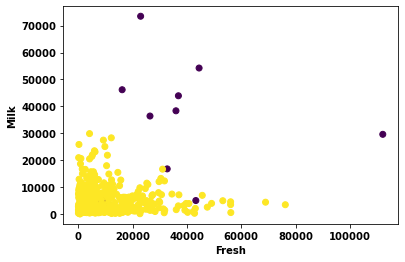

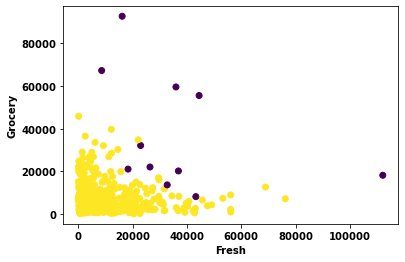

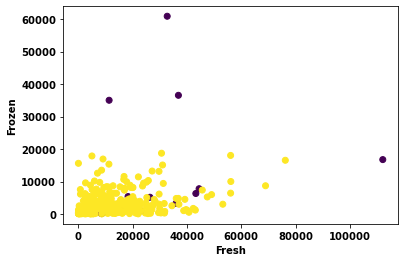

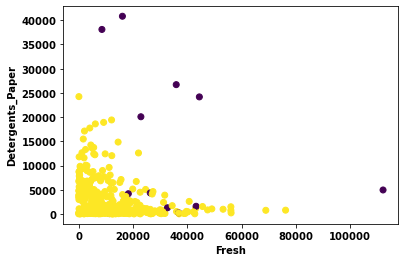

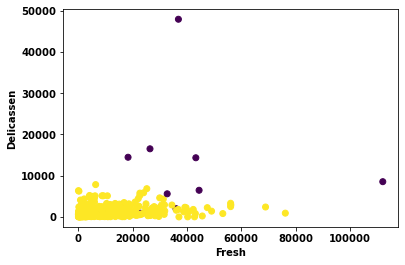

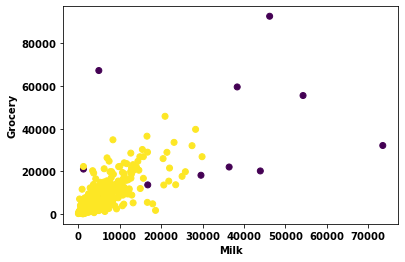

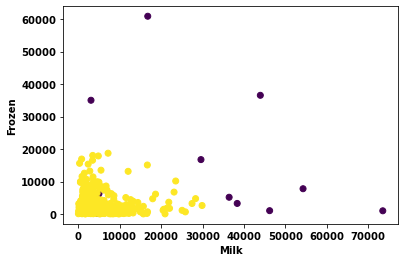

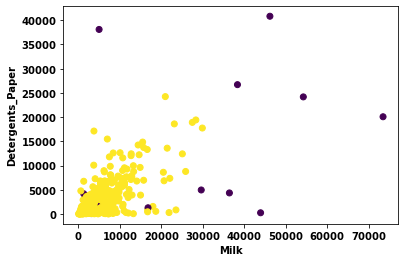

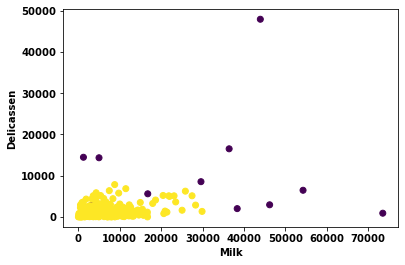

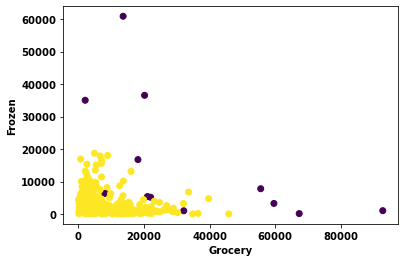

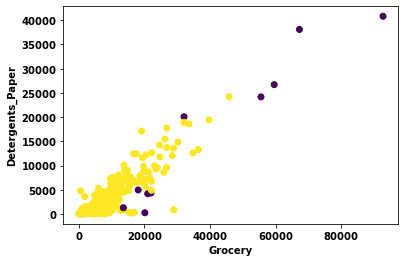

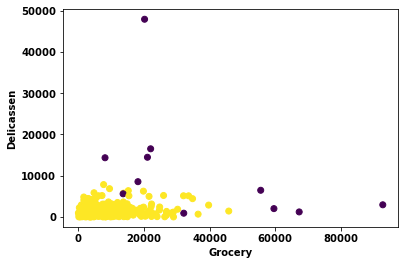

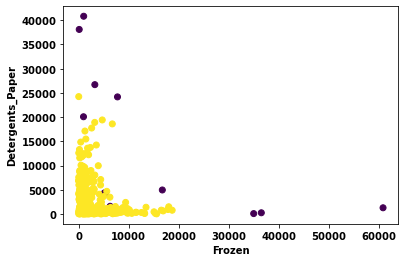

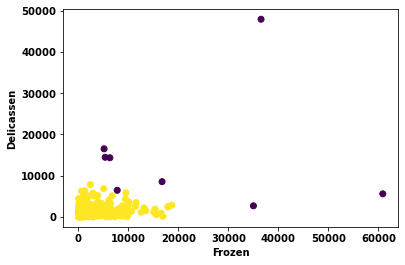

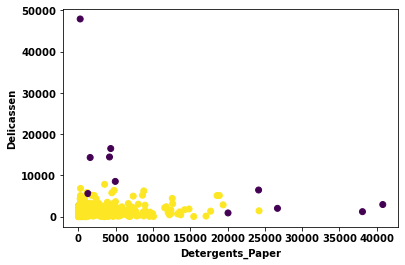

In [268]:
# Apply DBSCAN for the lowest eps and lowest min_samples with best Silhouette Score
clustering = DBSCAN(eps= 2.25, min_samples= 2).fit(customers_scale)
customers['labels_DBSCAN'] = clustering.labels_

plt.scatter(customers['Fresh'], customers['Milk'], c= customers['labels_DBSCAN'])
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()
display(plt.scatter(customers['Fresh'], customers['Grocery'], c= customers['labels_DBSCAN']))
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.show()
display(plt.scatter(customers['Fresh'], customers['Frozen'], c= customers['labels_DBSCAN']))
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.show()
display(plt.scatter(customers['Fresh'], customers['Detergents_Paper'], c= customers['labels_DBSCAN']))
plt.xlabel('Fresh')
plt.ylabel('Detergents_Paper')
plt.show()
display(plt.scatter(customers['Fresh'], customers['Delicassen'], c= customers['labels_DBSCAN']))
plt.xlabel('Fresh')
plt.ylabel('Delicassen')
plt.show()
display(plt.scatter(customers['Milk'], customers['Grocery'], c= customers['labels_DBSCAN']))
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()
display(plt.scatter(customers['Milk'], customers['Frozen'], c= customers['labels_DBSCAN']))
plt.xlabel('Milk')
plt.ylabel('Frozen')
plt.show()
display(plt.scatter(customers['Milk'], customers['Detergents_Paper'], c= customers['labels_DBSCAN']))
plt.xlabel('Milk')
plt.ylabel('Detergents_Paper')
plt.show()
display(plt.scatter(customers['Milk'], customers['Delicassen'], c= customers['labels_DBSCAN']))
plt.xlabel('Milk')
plt.ylabel('Delicassen')
plt.show()
display(plt.scatter(customers['Grocery'], customers['Frozen'], c= customers['labels_DBSCAN']))
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.show()
display(plt.scatter(customers['Grocery'], customers['Detergents_Paper'], c= customers['labels_DBSCAN']))
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.show()
display(plt.scatter(customers['Grocery'], customers['Delicassen'], c= customers['labels_DBSCAN']))
plt.xlabel('Grocery')
plt.ylabel('Delicassen')
plt.show()
display(plt.scatter(customers['Frozen'], customers['Detergents_Paper'], c= customers['labels_DBSCAN']))
plt.xlabel('Frozen')
plt.ylabel('Detergents_Paper')
plt.show()
display(plt.scatter(customers['Frozen'], customers['Delicassen'], c= customers['labels_DBSCAN']))
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.show()
display(plt.scatter(customers['Detergents_Paper'], customers['Delicassen'], c= customers['labels_DBSCAN']))
plt.xlabel('Detergents_Paper')
plt.ylabel('Delicassen')
plt.show()

In [35]:
# Your comment here
# Considering the best hyperparameters for K-Means and DBSCAN, the latter provides the best Silhouette Score for this 
# dataset.